In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

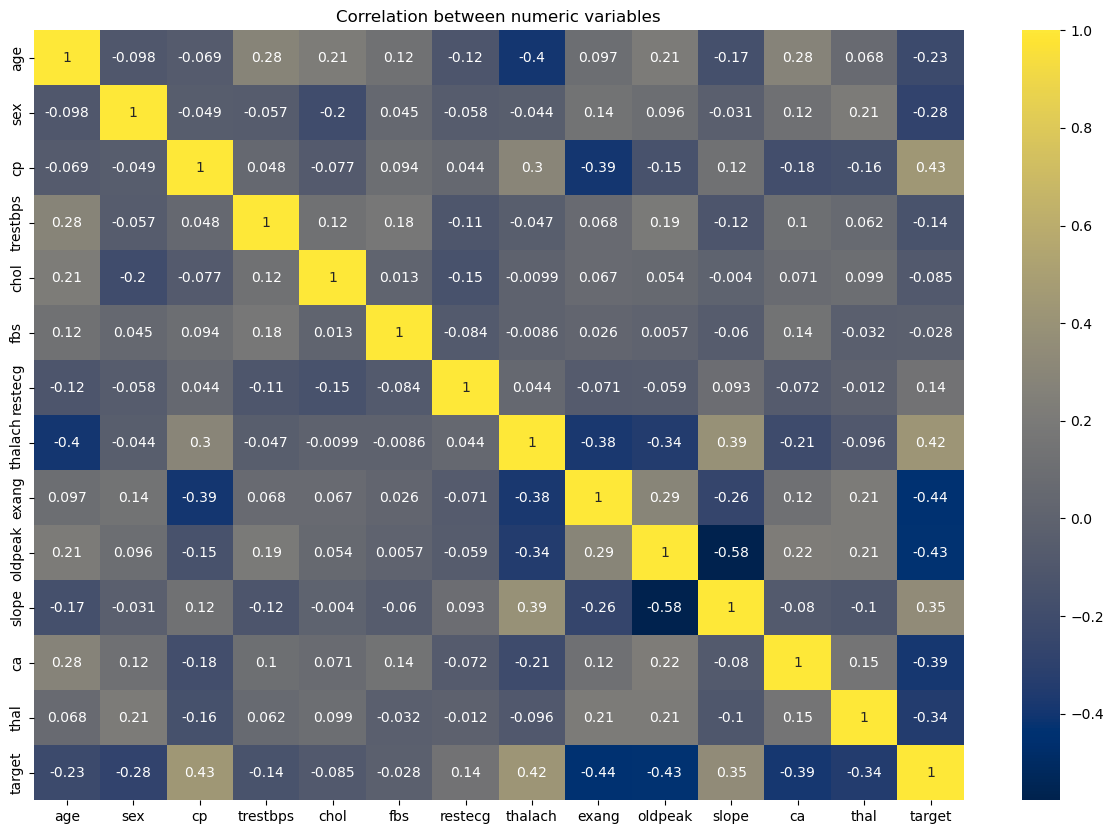

In [4]:
corr_pearson = data.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_pearson, cmap="cividis", annot=True)

plt.title('Correlation between numeric variables')
plt.show()

In [5]:
#2,6,7,10
X = data.iloc[:, [6,7]].values
y = data.iloc[:, 13].values

In [6]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
classifier = svm.SVC(kernel='sigmoid')  # Anda dapat memilih kernel yang sesuai

# Melatih model SVM
classifier.fit(X_train, y_train)

# Melakukan prediksi
y_pred = classifier.predict(X_test)

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

C:\Users\Hani\AppData\Local\Temp\ipykernel_8692\2863249876.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


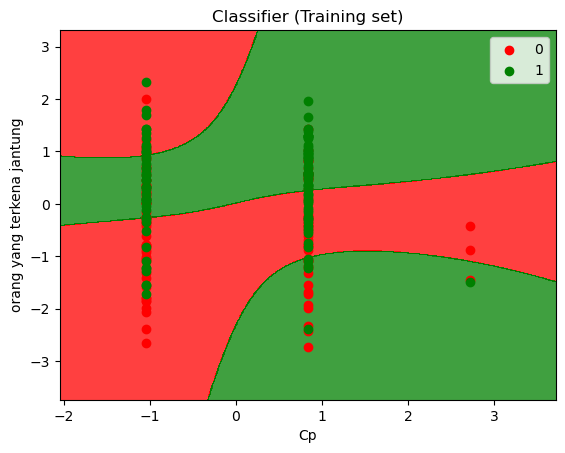

In [10]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Cp')
plt.ylabel('orang yang terkena jantung')
plt.legend()
plt.show()

In [11]:
cp = LabelEncoder()
restecg = LabelEncoder()
thalach = LabelEncoder()
slope	= LabelEncoder()

# CP = chest pain
# restecg = tes untuk mendeteksi masalah jantung
# thalach = Thallium Stress Test
# slope = 


In [12]:
X = data[['cp','restecg','thalach','slope']]
y = data['target']

In [13]:
clf = svm.SVC(kernel='linear')  # Menggunakan kernel linear untuk hyperplane linear
clf.fit(X, y)  # Melatih model pada data


SVC(kernel='linear')

In [14]:
# Mendapatkan vektor bobot hyperplane
w = clf.coef_

# Mendapatkan intersep hyperplane
b = clf.intercept_


In [15]:
# X = data[['cp','restecg','thalach','slope']]
# y = data['target']

# # Bagi dataset menjadi data pelatihan dan pengujian
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Inisialisasi model SVM
# svm_model = SVC(kernel='poly')  # Anda dapat mengganti kernel sesuai dengan kebutuhan (linear, rbf, poly, dll.)

# # Latih model dengan data pelatihan
# svm_model.fit(X_train, y_train)

# # Lakukan prediksi pada data pengujian
# y_pred = svm_model.predict(X_test)

# # Evaluasi model dengan mengukur akurasi
# accuracy = accuracy_score(y_test, y_pred)
# print("Akurasi SVM:", accuracy)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(227, 2)
(227,)
(76, 2)
(76,)


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.51      0.57        35
           1       0.65      0.76      0.70        41

    accuracy                           0.64        76
   macro avg       0.64      0.64      0.63        76
weighted avg       0.64      0.64      0.64        76

